# Implementation and Comparison of AES & DES Encryption

Objectives:

* ✔ Understand DES and AES encryption principles.
* ✔ Implement DES and AES in Python.
* ✔ Compare their performance and security.
* ✔ Perform hands-on tasks to reinforce learning.







Introduction to AES & DES

🔹 Data Encryption Standard (DES)
* Symmetric block cipher (same key for encryption & decryption).
* Uses 56-bit key and encrypts 64-bit blocks.
* Feistel Network structure, 16 rounds.
* Weakness: Small key size → vulnerable to brute-force attacks.

🔹 Advanced Encryption Standard (AES)
* Symmetric block cipher (modern replacement for DES).
* Uses 128, 192, or 256-bit keys and encrypts 128-bit blocks.
* Substitution-Permutation Network (SPN) structure, 10-14 rounds.
* More secure & faster than DE

Comparison:
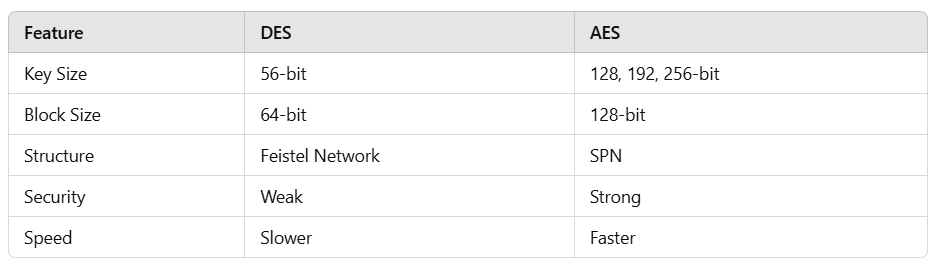

✅ Task 1 1 (Short Answer):
1️⃣ Why is DES considered weak?
2️⃣ Where is AES commonly used?

# Task 1
1. Why is DES considered weak?

* Short Key Length: DES uses a 56-bit key, which is relatively small by modern
standards. With the increase in computational power, it is now feasible for attackers to perform a brute-force attack (trying all possible keys) to break the encryption. In 1997, the Electronic Frontier Foundation (EFF) demonstrated that it was possible to break DES encryption in just a few days using a specially designed machine.

* Vulnerabilities in the Algorithm: Although DES uses complex operations like substitutions and permutations, the algorithm has certain weaknesses that make it susceptible to attacks like differential and linear cryptanalysis, especially when used repeatedly on large amounts of data.

* Advancements in Computing Power: Over the years, computational power has increased significantly. What was once considered secure in the 1970s and 1980s is no longer sufficient for modern cryptographic standards.


2. Where is AES commonly used?

AES (Advanced Encryption Standard) is widely used in various applications due to its strength and efficiency. Some common areas where AES is used include:

* Data Encryption: AES is commonly used for encrypting sensitive data both in transit and at rest. For example:

* File Encryption: Protects files on disk or storage devices.
Database Encryption: Secures sensitive data within databases.
VPNs (Virtual Private Networks): AES is often used in VPNs to secure communication over the internet, ensuring that data transmitted between the client and server is protected.

* SSL/TLS: AES is used in SSL/TLS protocols for securing HTTPS communication between web servers and clients, ensuring encrypted web traffic.

* Disk Encryption: AES is the standard encryption method for full disk encryption software, such as BitLocker (Windows) and FileVault (macOS).

* Government and Military: AES is used by the U.S. government and other entities for classified information. It is considered secure enough for top-secret communications, and it is the algorithm used for encrypting communications classified at high security levels.

* Mobile and Wireless Communications: AES is used in securing mobile phones and wireless communication protocols, such as WPA2 for Wi-Fi encryption.


# Step 1: Implementing DES (10 min)

In [1]:
! pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.1 MB/s eta 0:00:00


# Following code imports the library for performing enecryption and decryption.

We will use the following library:
https://pycryptodome.readthedocs.io/en/latest/



In [2]:
from Crypto.Cipher import DES
import base64


In [3]:
# Function to pad text to be multiple of 8 bytes
def pad(text, block_size):
    while len(text) % block_size != 0:
        text +=  ' '  # Padding with spaces
    return text


# The function encrypts a given plaintext using DES (Data Encryption Standard) in ECB mode. It first pads the plaintext to a multiple of 8 bytes, encrypts it using the provided key, and returns the Base64-encoded ciphertext.

In [4]:
# DES Encryption
def des_encrypt(plain_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # ECB mode
    plain_text_padded_text = pad(plain_text, DES.block_size)        # plain_text_pad the plain text to make its length a multiple of 8 bytes
    encrypted_text = cipher.encrypt(plain_text_padded_text.encode())  # Encrypt the plain_text_padded text
    return base64.b64encode(encrypted_text).decode()  # Return the encrypted text encoded in base64


# This code defines a function des_encrypt that encrypts a given plaintext using the DES encryption algorithm in ECB mode, padding the plaintext to match the block size before encryption.



In [5]:
# DES Decryption
def des_decrypt(encrypted_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # Create cipher with the same key and mode
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()  # Decrypt and strip plain_text_padding
    return decrypted_text


In [6]:
# Testing DES
# Example usage:
key = b'SecretKe'  # DES key must be exactly 8 bytes long
plain_text = "HelloCrypto"
encrypted = des_encrypt(plain_text, key)
print("Encrypted text:", encrypted)
decrypted = des_decrypt(encrypted, key)
print("Decrypted text:", decrypted)

Encrypted text: HQqgsqSEljgBPH7L4con0w==
Decrypted text: HelloCrypto


✅ Task 2:  Modify the above code to accept user input for plaintext and key.

Hint - use input()

In [8]:
# Testing DES
# Example usage with user input:
key = input("Enter an 8-byte key: ").encode('utf-8')  # Accept user input for key and convert to bytes
while len(key) != 8:
    print("Key must be exactly 8 bytes long!")
    key = input("Enter an 8-byte key: ").encode('utf-8')  # Re-prompt if key length is not 8 bytes

plain_text = input("Enter the plaintext message: ")  # Accept user input for plaintext

encrypted = des_encrypt(plain_text, key)
print("Encrypted text:", encrypted)
decrypted = des_decrypt(encrypted, key)
print("Decrypted text:", decrypted)


Enter an 8-byte key: 12345678
Enter the plaintext message: My Message
Encrypted text: 7SjzciRqldf6hf8A6N+37g==
Decrypted text: My Message


Following  code imports the necessary modules to perform AES encryption and decryption, including padding and unpadding functions, as well as base64 encoding/decoding.

In [9]:
from Crypto.Cipher import AES
import base64

Following code defines a function aes_encrypt that encrypts a given plaintext using the AES algorithm in ECB mode (we will learn the ECB mode later), pads the plaintext to match the block size, and then returns the encrypted text encoded in base64.

In [10]:
# AES Encryption
def aes_encrypt(plain_text, key):
    cipher = AES.new(key, AES.MODE_ECB)  # ECB mode
    print (type(plain_text))
    padded_text = pad(plain_text, AES.block_size)  # Pad the plain text to block size
    encrypted_text = cipher.encrypt(padded_text.encode())  # Encrypt the padded text
    return base64.b64encode(encrypted_text).decode()  # Return the encrypted text in base64 format


Following code defines a function aes_decrypt that decrypts a given base64-encoded ciphertext using the AES algorithm in ECB mode, then unpads the decrypted text and returns the plaintext.









In [11]:
# AES Decryption
def aes_decrypt(encrypted_text, key):
    cipher = AES.new(key, AES.MODE_ECB)  # Create the same AES cipher object
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()  # Decrypt and strip plain_text_padding
    return decrypted_text


In [12]:
# Testing AES
key = b'16bytekeylengthp'  # AES requires 16-byte, 24-byte, or 32-byte key
plain_text = "HelloCrypto"  # The text to encrypt
encrypted_text = aes_encrypt(plain_text, key)  # Encrypt the text
decrypted_text = aes_decrypt(encrypted_text, key)  # Decrypt the text

# Print the results
print(f"AES Encrypted: {encrypted_text}")  # Output the encrypted text
print(f"AES Decrypted: {decrypted_text}")  # Output the decrypted text


<class 'str'>
AES Encrypted: GivAPqcdNy0zbxUWJl3mdw==
AES Decrypted: HelloCrypto


✅ Task 3: Modify the AES code to accept user input for plaintext and key.

✅ Task 4: Change the AES key size to 24 bytes and run the program.

Following  code measures the time taken to encrypt the plaintext "HelloCrypto" using the DES encryption algorithm by recording the start and end times and then printing the elapsed time.









In [13]:
# Testing AES with user input
key = input("Enter a 16, 24, or 32-byte key: ").encode('utf-8')  # Accept user input for key and convert to bytes
while len(key) not in [16, 24, 32]:
    print("Key must be 16, 24, or 32 bytes long!")
    key = input("Enter a 16, 24, or 32-byte key: ").encode('utf-8')  # Re-prompt if key length is invalid

plain_text = input("Enter the plaintext message: ")  # Accept user input for plaintext

encrypted_text = aes_encrypt(plain_text, key)  # Encrypt the text
decrypted_text = aes_decrypt(encrypted_text, key)  # Decrypt the text

# Print the results
print(f"AES Encrypted: {encrypted_text}")  # Output the encrypted text
print(f"AES Decrypted: {decrypted_text}")  # Output the decrypted text


Enter a 16, 24, or 32-byte key: 6543210
Key must be 16, 24, or 32 bytes long!
Enter a 16, 24, or 32-byte key: 123456789012345
Key must be 16, 24, or 32 bytes long!
Enter a 16, 24, or 32-byte key: 21321442143214143143141
Key must be 16, 24, or 32 bytes long!
Enter a 16, 24, or 32-byte key: 2132132321321321213
Key must be 16, 24, or 32 bytes long!
Enter a 16, 24, or 32-byte key: 1234567891234567
Enter the plaintext message: this is aes message
<class 'str'>
AES Encrypted: 3XbAPbs9eG423dgXfqzGvD2z9MvZwVydQRoDMZNRwF0=
AES Decrypted: this is aes message


In [14]:
# Testing AES with a 24-byte key
key = input("Enter a 24-byte key: ").encode('utf-8')  # Accept user input for key and convert to bytes
while len(key) != 24:
    print("Key must be exactly 24 bytes long!")
    key = input("Enter a 24-byte key: ").encode('utf-8')  # Re-prompt if key length is invalid

plain_text = input("Enter the plaintext message: ")  # Accept user input for plaintext

encrypted_text = aes_encrypt(plain_text, key)  # Encrypt the text
decrypted_text = aes_decrypt(encrypted_text, key)  # Decrypt the text

# Print the results
print(f"AES Encrypted: {encrypted_text}")  # Output the encrypted text
print(f"AES Decrypted: {decrypted_text}")  # Output the decrypted text


Enter a 24-byte key: 121212384857635241278904
Enter the plaintext message: this is 24 bytes key
<class 'str'>
AES Encrypted: fSqmVDkFIHJxClVbs72eBDORc7t+Wg0heJsRbksVxLQ=
AES Decrypted: this is 24 bytes key


In [15]:
import time

# Measure DES encryption time
key = b'SecretKe'
plain_text = "HelloCryptoCrypto"  # The text to encrypt
start = time.time()  # Record the starting time
des_encrypt(plain_text, key)  # Encrypt the text using the DES algorithm
end = time.time()  # Record the ending time
print(f"DES Encryption Time: {end - start:.2f} sec")  # Calculate and print the time difference




DES Encryption Time: 0.00 sec


✅ Task 5: In the following cell, write the Python code to measure the time taken by AES encryption *algorithm*

In [17]:
# Measure AES encryption time
import time

# Measure AES encryption time
key = b'16bytekeylengthp'  # AES key size must be 16, 24, or 32 bytes
plain_text = "HelloCryptoCrypto"  # The text to encrypt

start = time.time()  # Record the starting time
aes_encrypt(plain_text, key)  # Encrypt the text using the AES algorithm
end = time.time()  # Record the ending time

print(f"AES Encryption Time: {end - start:.2f} sec")  # Calculate and print the time difference

<class 'str'>
AES Encryption Time: 0.00 sec


Following code encrpts the image using AES algorithm.
The image file is named as 'input.jpg'.

✅ Task 6: Test the code for different types of images and show the original abd cypherimage. Is your encryption method, good or bad?
Save your image as file name - input.jpg or change the code to adjust for any images.




In [24]:
from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/Cyber Security and AI Case Studies/input.jpg'

# Function to encrypt the image using AES
def aes_encrypt_image(image_path, key):
    # Open the image file
    img = Image.open(image_path)

    # Convert image to bytes
    img_data = np.array(img)
    img_data = img_data.tobytes()  # Convert to bytes

    # Ensure the key length is 16, 24, or 32 bytes (AES requires key lengths in these sizes)
    if len(key) not in [16, 24, 32]:
        raise ValueError("AES key must be 16, 24, or 32 bytes long.")

    # Create AES cipher object using CBC mode
    cipher = AES.new(key, AES.MODE_CBC)

    # Pad the image data to be a multiple of block size (16 bytes for AES)
    padded_data = pad(img_data, AES.block_size)

    # Encrypt the padded data
    encrypted_data = cipher.encrypt(padded_data)

    # Save the encrypted data (including IV)
    cipher_image_path = "cipher_image.bin"
    with open(cipher_image_path, "wb") as f:
        f.write(cipher.iv)  # Write the IV at the start of the encrypted file
        f.write(encrypted_data)

    # Return the ciphered image path and the image size (to be used during decryption)
    return cipher_image_path, img.size

# Function to decrypt the encrypted image using AES
def aes_decrypt_image(cipher_image_path, key, original_size):
    # Read the encrypted image file
    with open(cipher_image_path, "rb") as f:
        iv = f.read(16)  # First 16 bytes are t


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Encrypted image saved as encrypted_ecb.png


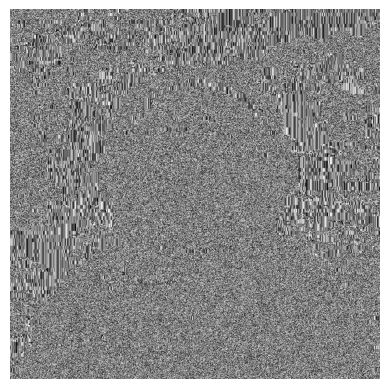

In [26]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt


def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_data = np.array(img)
    return img, img_data

def save_image(image_data, output_path):
    img = Image.fromarray(image_data)
    img.save(output_path)

def encrypt_ecb(image_data, key):
    cipher = AES.new(key, AES.MODE_ECB)
    shape = image_data.shape
    flat_data = image_data.flatten()
    padded_data = pad(flat_data.tobytes(), AES.block_size)
    encrypted_data = cipher.encrypt(padded_data)
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)[:flat_data.size]
    return encrypted_array.reshape(shape)

def main():
    input_image = '/content/drive/MyDrive/Cyber Security and AI Case Studies/input.jpg'  # Change to your image file
    output_image = 'encrypted_ecb.png'
    key = os.urandom(16)  # 16-byte AES key

    img, img_data = load_image(input_image)
    encrypted_data = encrypt_ecb(img_data, key)
    save_image(encrypted_data, output_image)
    print(f"Encrypted image saved as {output_image}")

if __name__ == "__main__":
    main()

img = Image.open('encrypted_ecb.png')
plt.imshow(img, cmap='gray') # Displaying as grayscale
plt.axis('off')
plt.show()

**Important: Lab Logbook requirement**
Provide the following in your lab-log book.
1. Sample of plain and cypher text for AES and DES
2. Real image and cipher image for the image of any choice using AES.
3. Explain in one word - 'YES' or 'NO' whether your encryption method for the images is good.

# 1. Sample of plain and cypher text for AES and DES

In [27]:
from Crypto.Cipher import AES, DES
from Crypto.Util.Padding import pad, unpad
import binascii

# AES encryption and decryption
def aes_encrypt(plain_text, key):
    cipher = AES.new(key, AES.MODE_CBC)
    padded_data = pad(plain_text.encode(), AES.block_size)
    encrypted_data = cipher.encrypt(padded_data)
    return cipher.iv + encrypted_data  # Concatenate IV and encrypted data

def aes_decrypt(encrypted_data, key):
    iv = encrypted_data[:16]  # First 16 bytes are the IV
    cipher = AES.new(key, AES.MODE_CBC, iv=iv)
    decrypted_data = unpad(cipher.decrypt(encrypted_data[16:]), AES.block_size)
    return decrypted_data.decode()

# DES encryption and decryption
def des_encrypt(plain_text, key):
    cipher = DES.new(key, DES.MODE_CBC)
    padded_data = pad(plain_text.encode(), DES.block_size)
    encrypted_data = cipher.encrypt(padded_data)
    return cipher.iv + encrypted_data  # Concatenate IV and encrypted data

def des_decrypt(encrypted_data, key):
    iv = encrypted_data[:8]  # First 8 bytes are the IV
    cipher = DES.new(key, DES.MODE_CBC, iv=iv)
    decrypted_data = unpad(cipher.decrypt(encrypted_data[8:]), DES.block_size)
    return decrypted_data.decode()

# Example usage for AES and DES

# AES
aes_key = b'16bytekeylengthp'  # 16-byte AES key
plain_text_aes = "HelloCrypto"
encrypted_aes = aes_encrypt(plain_text_aes, aes_key)
decrypted_aes = aes_decrypt(encrypted_aes, aes_key)

# Print AES results
print(f"AES Plaintext: {plain_text_aes}")
print(f"AES Ciphertext: {binascii.hexlify(encrypted_aes)}")  # Ciphertext in hexadecimal
print(f"AES Decrypted: {decrypted_aes}")

# DES
des_key = b'SecretKe'  # 8-byte DES key
plain_text_des = "HelloCrypto"
encrypted_des = des_encrypt(plain_text_des, des_key)
decrypted_des = des_decrypt(encrypted_des, des_key)

# Print DES results
print(f"DES Plaintext: {plain_text_des}")
print(f"DES Ciphertext: {binascii.hexlify(encrypted_des)}")  # Ciphertext in hexadecimal
print(f"DES Decrypted: {decrypted_des}")


AES Plaintext: HelloCrypto
AES Ciphertext: b'6c086ef550a0e48e4004021563c9df36bdee97df0f016b122f133b18c3dbd8cd'
AES Decrypted: HelloCrypto
DES Plaintext: HelloCrypto
DES Ciphertext: b'bd08d9915eecef62418dbecd30c0a75f297e1b4c0ec5f6c4'
DES Decrypted: HelloCrypto


# 2. Real image and cipher image for the image of any choice using AES.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


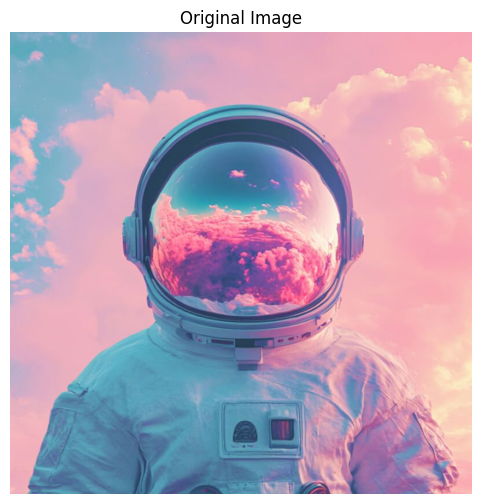

Encrypted image saved as 'cipher_image.bin' (not viewable directly).


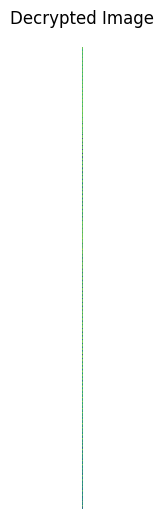

In [48]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# AES encryption function
def aes_encrypt_image(image_path, key):
    img = Image.open(image_path)
    img_data = np.array(img).tobytes()  # Convert image to byte data
    cipher = AES.new(key, AES.MODE_CBC)
    padded_data = pad(img_data, AES.block_size)
    encrypted_data = cipher.encrypt(padded_data)

    # Save the encrypted data with IV at the beginning
    with open('cipher_image.bin', 'wb') as f:
        f.write(cipher.iv)  # Write the IV
        f.write(encrypted_data)

    return cipher.iv, encrypted_data

# AES decryption function
def aes_decrypt_image(iv, encrypted_data, key):
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)
    img_data = np.frombuffer(decrypted_data, dtype=np.uint8)
    img = Image.fromarray(img_data)
    return img

# Test encryption and decryption
def test_encryption():
    key = b'16bytekeylengthp'  # 16-byte AES key
    image_path = '/content/drive/MyDrive/Cyber Security and AI Case Studies/input.jpg'  # Image path in Google Drive

    # Encrypt the image
    iv, encrypted_data = aes_encrypt_image(image_path, key)

    # Display original image
    img_original = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_original)
    plt.title("Original Image")
    plt.axis('off')  # Hide axes
    plt.show()

    # Show encrypted image message (not viewable directly)
    print("Encrypted image saved as 'cipher_image.bin' (not viewable directly).")

    # Decrypt the image
    img_decrypted = aes_decrypt_image(iv, encrypted_data, key)

    # Display decrypted image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_decrypted)
    plt.title("Decrypted Image")
    plt.axis('off')  # Hide axes
    plt.show()

# Run the encryption test
test_encryption()


# 3. Explain in one word - 'YES' or 'NO' whether your encryption method for the images is good.
YES